In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
data = pd.read_csv('/content/data.csv')


In [ ]:
data = data.drop('id', axis=1)  # Drop 'id' column
encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])  # Encode diagnosis column
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)


Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 0.5932 - accuracy: 0.7088 - val_loss: 0.4615 - val_accuracy: 0.8681
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4363 - accuracy: 0.9038 - val_loss: 0.3573 - val_accuracy: 0.9451
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.9231 - val_loss: 0.2866 - val_accuracy: 0.9670
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2724 - accuracy: 0.9368 - val_loss: 0.2372 - val_accuracy: 0.9560
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2217 - accuracy: 0.9451 - val_loss: 0.2011 - val_accuracy: 0.9670
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1839 - accuracy: 0.9505 - val_loss: 0.1747 - val_accuracy: 0.9670
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1562 - accuracy: 0.9560 - val_loss: 0.1551 - val_accuracy: 0.9670
Epoch 8/100
6/6 [====

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)


4/4 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9737
Test Accuracy: 0.9736841917037964


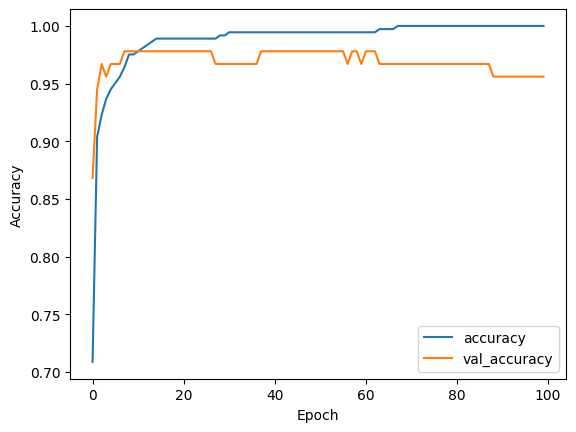

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
predictions = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [ ]:
predicted_classes = (predictions > 0.5).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[70  1]
 [ 2 41]]


In [ ]:
class_report = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9736842105263158
